<a href="https://colab.research.google.com/github/oilnutttt/BasicProg_DataViz65/blob/main/Discretization_Normalization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import json
import numpy as np
import geopy.distance

Normalization-Standardization

ทำให้นน อยู่ในระดับเดียวกัน


In [28]:
from google.colab import drive 
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
import os
os.chdir('/content/gdrive/MyDrive/bscdata')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/gdrive/MyDrive/bscdata


ใช้ data กรมอุตุ

In [30]:
weather_data = pd.read_csv('group9.csv')
print(weather_data.shape)
weather_data.head(3)

(8169, 12)


,จังหวัด,วัน,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,24.8,27.6
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,23.0,25.6
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,22.1,25.6


In [31]:
data_features = weather_data.iloc[:,4:]
data_features.head(3)

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,1005.47,83,3,9,1.4,24.2,24.8,27.6
1,1006.65,92,2,10,17.7,24.0,23.0,25.6
2,1007.49,86,3,10,3,22.9,22.1,25.6


In [32]:
data_features.dtypes

ความกด                float64
ความชื้นสัมพัทธ์        int64
ความเร็วลม             object
จำนวนเมฆ               object
ปริมาณฝน               object
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิต่ำสุด         object
อุณหภูมิตุ้มแห้ง      float64
dtype: object

In [33]:
data_features.describe()

,ความกด,ความชื้นสัมพัทธ์,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้มแห้ง
count,8169.000000,8169.000000,8169.000000,8169.000000
mean,1013.016946,69.798262,18.151916,24.868405
std,3.224640,8.870501,3.775475,2.846185
min,1002.040000,38.000000,1.500000,11.800000
25%,1010.960000,64.000000,15.800000,23.300000
50%,1012.800000,69.000000,18.400000,25.300000
75%,1015.010000,75.000000,21.000000,27.000000
max,1026.100000,99.000000,28.400000,31.000000


In [34]:
data_features[data_features['ความเร็วลม'].eq('-')]

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
1079,1012.65,87,-,-,53.3,23.5,24.5,25.8
1122,1011.47,61,-,-,-,19.7,22.7,28.5
1773,1008.50,73,-,4,0,20.2,20,25.6
1776,1009.51,89,-,7,1.2,22.0,21.1,24.2
1856,1009.45,73,-,4,0,23.9,24.9,29.7
1862,1011.50,70,-,6,0,21.0,22.2,27.5
1927,1015.58,65,-,2,0,15.0,15.3,22.7
1995,1014.22,67,-,1,-,19.4,20.6,26.5
2063,1013.33,68,-,-,-,14.0,-,21.0
2125,1011.17,72,-,8,0,21.3,23.0,27.1


In [35]:
weather_data[weather_data['ความเร็วลม'].eq('-')] #หาอันที่มี -

,จังหวัด,วัน,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
1079,ขอนแก่น,21,10,2018,1012.65,87,-,-,53.3,23.5,24.5,25.8
1122,ขอนแก่น,3,12,2018,1011.47,61,-,-,-,19.7,22.7,28.5
1773,นครพนม,18,1,2012,1008.50,73,-,4,0,20.2,20,25.6
1776,นครพนม,21,1,2012,1009.51,89,-,7,1.2,22.0,21.1,24.2
1856,นครพนม,10,11,2012,1009.45,73,-,4,0,23.9,24.9,29.7
1862,นครพนม,16,11,2012,1011.50,70,-,6,0,21.0,22.2,27.5
1927,นครพนม,20,1,2013,1015.58,65,-,2,0,15.0,15.3,22.7
1995,นครพนม,29,10,2013,1014.22,67,-,1,-,19.4,20.6,26.5
2063,นครพนม,5,1,2014,1013.33,68,-,-,-,14.0,-,21.0
2125,นครพนม,8,10,2014,1011.17,72,-,8,0,21.3,23.0,27.1


In [36]:
weather_data[weather_data.eq('-').any(1)]

,จังหวัด,วัน,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
305,ขอนแก่น,3,10,2013,1009.88,78,4,4,-,23.5,24.3,27.9
306,ขอนแก่น,4,10,2013,1009.47,73,2,2,-,21.9,23.7,27.5
307,ขอนแก่น,5,10,2013,1008.08,69,3,3,-,20.7,22.5,27.3
308,ขอนแก่น,6,10,2013,1008.35,72,5,5,-,21.3,22.8,27.1
309,ขอนแก่น,7,10,2013,1009.30,72,2,2,-,21.3,23.5,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8086,หนองคาย,8,12,2021,1016.96,62,2,-,0,13.4,14.8,21.6
8092,หนองคาย,14,12,2021,1014.85,69,2,-,0,15.9,16.2,22.3
8093,หนองคาย,15,12,2021,1012.80,66,1,-,0,15.8,16.5,23.3
8117,หนองคาย,8,1,2022,1014.94,68,2,-,0,17.4,17.8,24.2


มี - ทั้งหมด 2961 drop ออก

In [40]:
data_features_d = data_features[data_features.eq('-').any(1)==False]

In [41]:
data_features_d = data_features_d[data_features_d.eq('T').any(1)==False]

In [42]:
data_features_d.shape

(5061, 8)

In [43]:
data_features_d.dtypes

ความกด                float64
ความชื้นสัมพัทธ์        int64
ความเร็วลม             object
จำนวนเมฆ               object
ปริมาณฝน               object
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิต่ำสุด         object
อุณหภูมิตุ้มแห้ง      float64
dtype: object

แปลงให้เป็นตัวเลข

In [44]:
data_features_d['ความเร็วลม'] = data_features_d['ความเร็วลม'].astype(float)
data_features_d['จำนวนเมฆ'] = data_features_d['จำนวนเมฆ'].astype(float)
data_features_d['ปริมาณฝน'] = data_features_d['ปริมาณฝน'].astype(float)
data_features_d['อุณหภูมิต่ำสุด'] = data_features_d['อุณหภูมิต่ำสุด'].astype(float)

In [45]:
data_features_d.describe()

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
count,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000
mean,1012.731324,70.438253,2.284726,3.308832,1.556194,18.420944,19.933570,25.002667
std,3.158633,9.433792,1.209540,2.494353,6.816712,3.630472,3.295887,2.720534
min,1002.040000,38.000000,0.000000,0.000000,0.000000,1.500000,6.800000,11.800000
25%,1010.760000,64.000000,1.000000,1.000000,0.000000,16.100000,17.900000,23.500000
50%,1012.610000,69.000000,2.000000,3.000000,0.000000,18.500000,20.300000,25.400000
75%,1014.710000,77.000000,3.000000,5.000000,0.000000,21.200000,22.500000,26.900000
max,1026.100000,99.000000,10.000000,10.000000,112.400000,28.400000,26.700000,31.000000


In [46]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[8,4] 

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3604 missing from current font.
  font.set_text(s

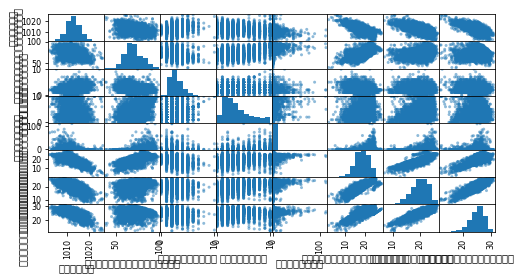

In [47]:
pd.plotting.scatter_matrix(data_features_d);

In [48]:
from matplotlib import pyplot as plt

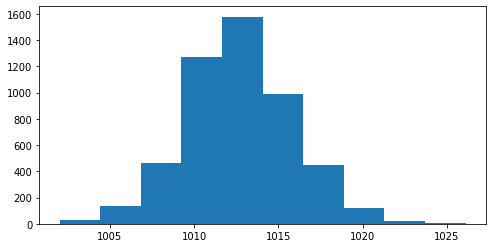

In [49]:
plt.hist(data_features_d['ความกด']);

In [50]:
from sklearn import preprocessing

จะเป็น 3 ขั้นตอนนี้ตลอด

In [51]:
#define ตั้งค่า
scaler = preprocessing.StandardScaler() #ปรับmean ให้เหลือ 0
#train เอามาสร้างmodel (.fit = เอามาfit กับdata)
scaler.fit(data_features_d)
#predict เอามาใช้งาน
data_features_d_s = scaler.transform(data_features_d)

#data_features_d_s = scaler.fit_transform(data_features_d) #รวม fit กับ transfrom

In [52]:
data_features_d_s #output ทุกอย่างกลายเป็น numpy

array([[-2.29910857,  1.33170074,  0.5914187 , ...,  1.59197655,
         1.47666181,  0.95480871],
       [-1.92549238,  2.28581221, -0.23542385, ...,  1.53688186,
         0.93047261,  0.21958617],
       [-1.65952832,  1.64973789,  0.5914187 , ...,  1.23386103,
         0.65737801,  0.21958617],
       ...,
       [ 1.25024518, -0.57652221, -1.06226641, ..., -0.88728479,
        -1.49703494, -0.8464865 ],
       [ 0.81647046, -0.89455937, -0.23542385, ..., -0.7220007 ,
        -0.73843883, -0.44211411],
       [ 0.10406672, -0.57652221, -0.23542385, ..., -0.17105374,
        -0.28328116,  0.14606392]])

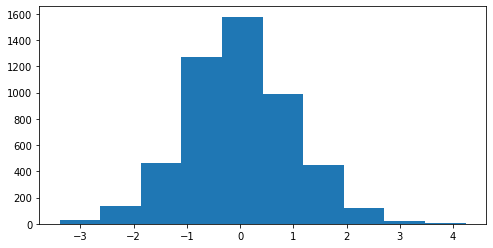

In [60]:
plt.hist(data_features_d_s[:,0]);

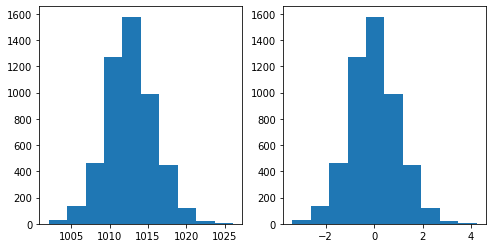

In [61]:
plt.subplot(1,2,1)
plt.hist(data_features_d['ความกด'])
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,0]) ;

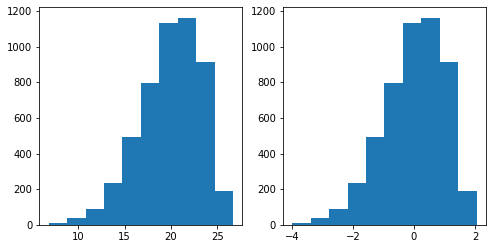

In [62]:
plt.subplot(1,2,1)
plt.hist(data_features_d['อุณหภูมิต่ำสุด'])
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,6]) ;

###Min-Max Normalization

In [66]:
#define
scalar = preprocessing.MinMaxScalar()
#train
scalar.fit(data_features_d)
#predict-transform
data_features_d_norm = scalar.transform(data_fearures_d)

AttributeError: ignored

In [ ]:
data_features_d_norm

array([[0.14256027, 0.73770492, 0.3       , ..., 0.84386617, 0.90452261,
        0.82291667],
       [0.19160432, 0.8852459 , 0.2       , ..., 0.83643123, 0.81407035,
        0.71875   ],
       [0.22651704, 0.78688525, 0.3       , ..., 0.79553903, 0.76884422,
        0.71875   ],
       ...,
       [0.6084788 , 0.44262295, 0.1       , ..., 0.50929368, 0.4120603 ,
        0.56770833],
       [0.55153782, 0.39344262, 0.2       , ..., 0.53159851, 0.53768844,
        0.625     ],
       [0.45802161, 0.44262295, 0.2       , ..., 0.60594796, 0.61306533,
        0.70833333]])

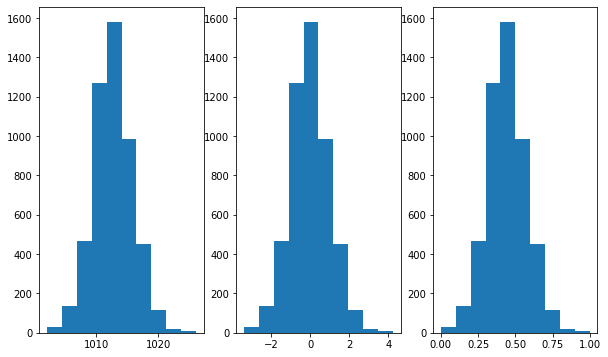

In [ ]:
plt.subplot(1,3,1)
plt.hist(data_features_d['ความกด'])
plt.subplot(1,3,2)
plt.hist(data_features_d_s[:,0]) ;
plt.subplot(1,3,3)
plt.hist(data_features_d_norm[:,0]) ;